<a href="https://colab.research.google.com/github/martinbedia/mineria/blob/main/ejercicio%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3
Genera al menos dos modelos de clustering utilizando el conjunto de datos
pokemon.csv y comenta el comportamiento observado. ¿Cuál es el número óptimo de clusters?
¿Están claramente diferenciados?

In [1]:
pip install pandas scikit-learn

In [2]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importar la base de datos pokemon
poke = pd.read_csv('pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
# Seleccionar características relevantes para clustering
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
X = poke[features]

In [6]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Método del codo para determinar el número óptimo de clusters (K-means)
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

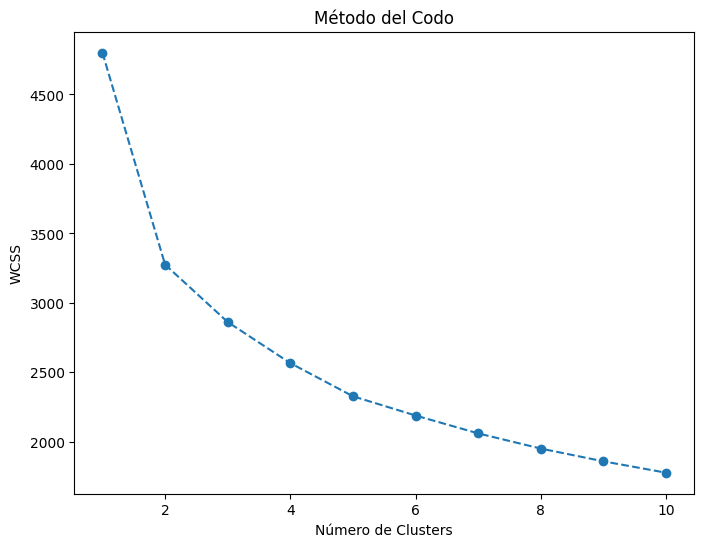

In [12]:
# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Basado en el método del codo, elige un número óptimo de clusters (e.g., 3)
num_clusters_optimo = 2

In [14]:
# K-means clustering
kmeans = KMeans(n_clusters=num_clusters_optimo, init='k-means++', random_state=42)
poke['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters_optimo)
poke['Agg_Cluster'] = agg_cluster.fit_predict(X_scaled)

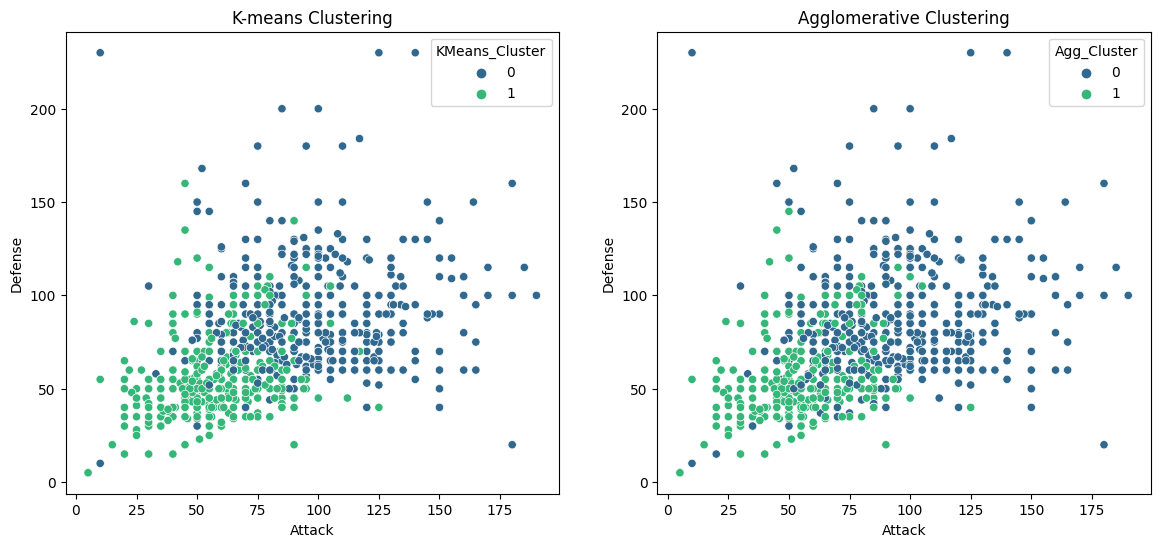

In [16]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Attack', y='Defense', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Attack', y='Defense', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

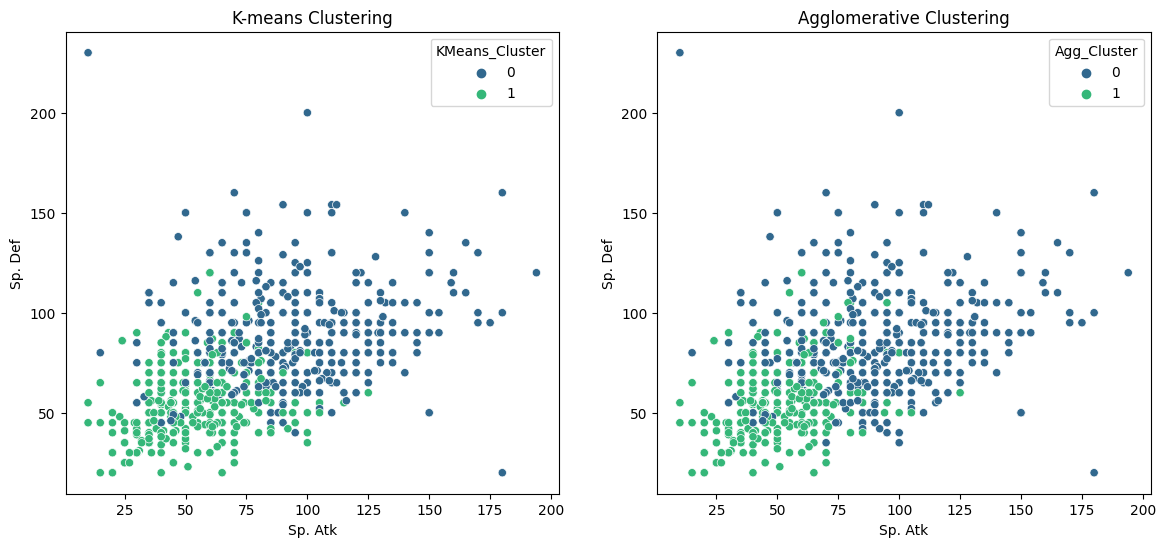

In [17]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Sp. Atk', y='Sp. Def', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Sp. Atk', y='Sp. Def', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

In [ ]:
"Sp. Atk", "Sp. Def"

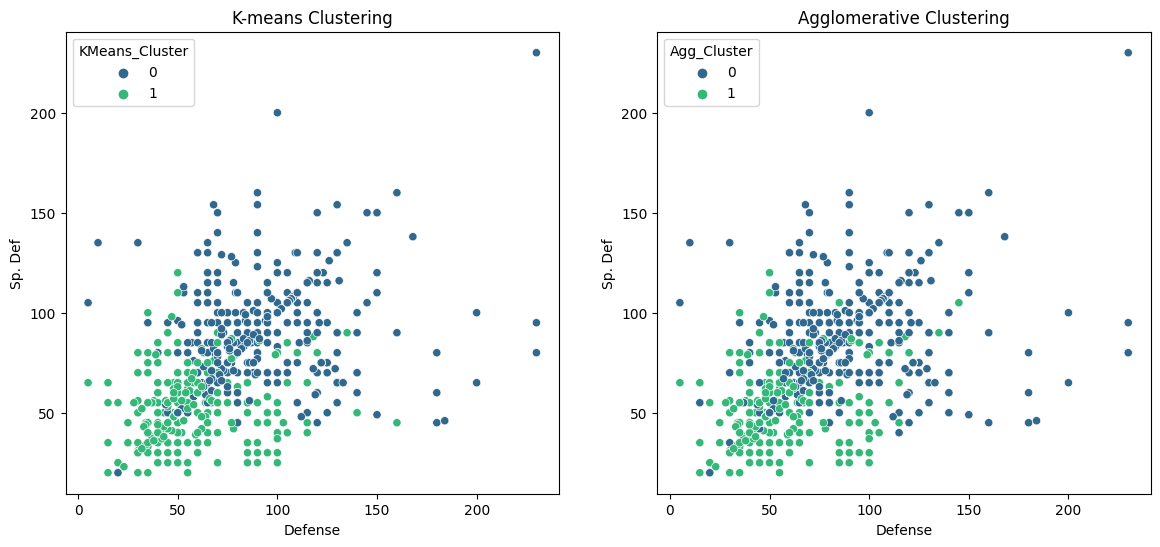

In [18]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Defense', y='Sp. Def', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Defense', y='Sp. Def', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

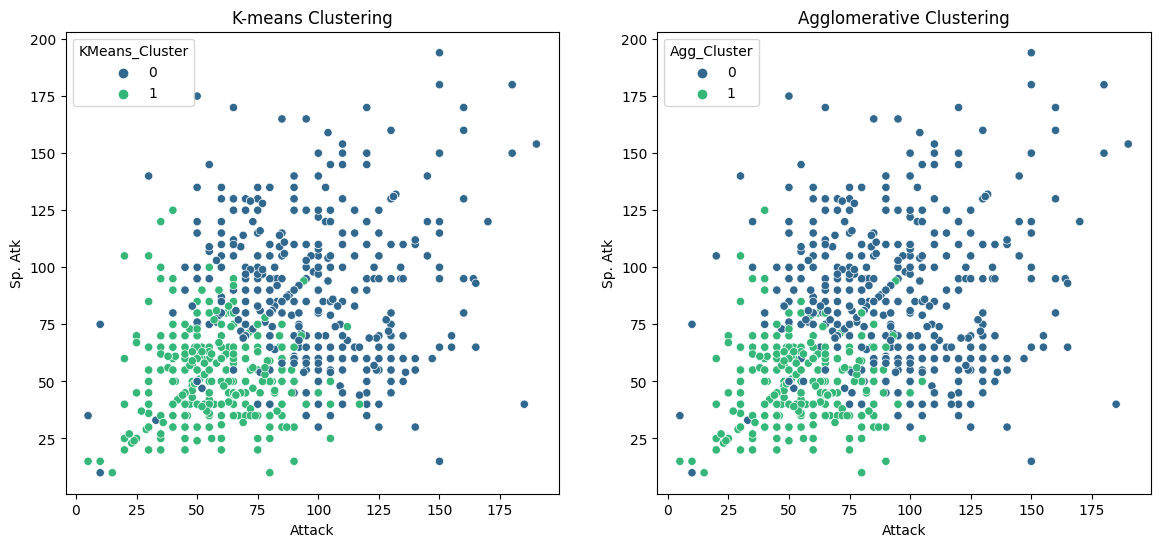

In [19]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Attack', y='Sp. Atk', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Attack', y='Sp. Atk', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

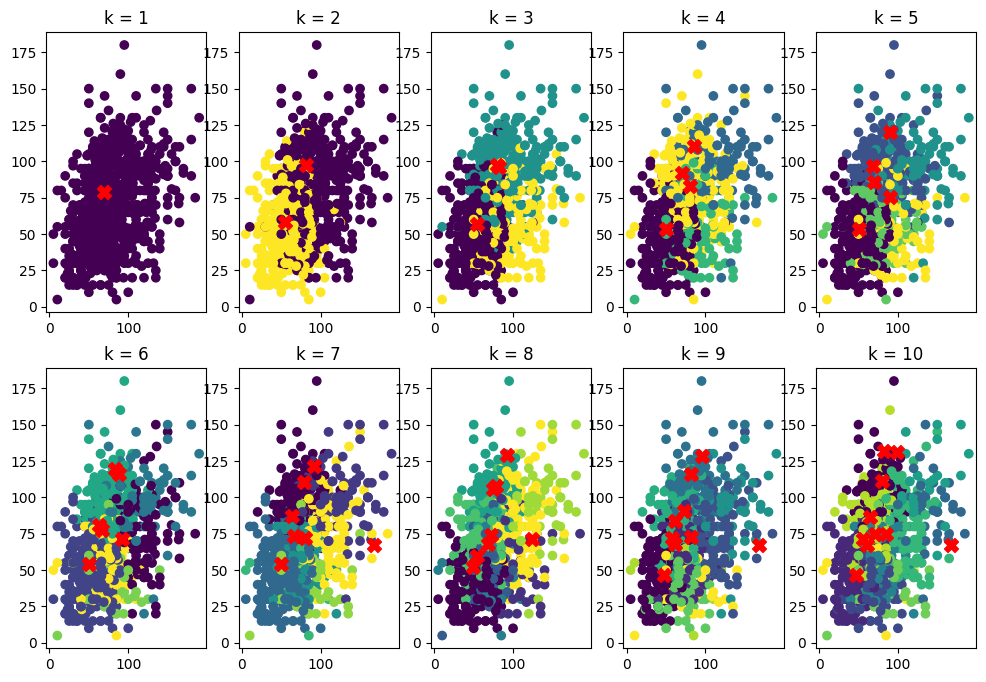

In [24]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(X)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(X["Attack"],X['Speed'], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

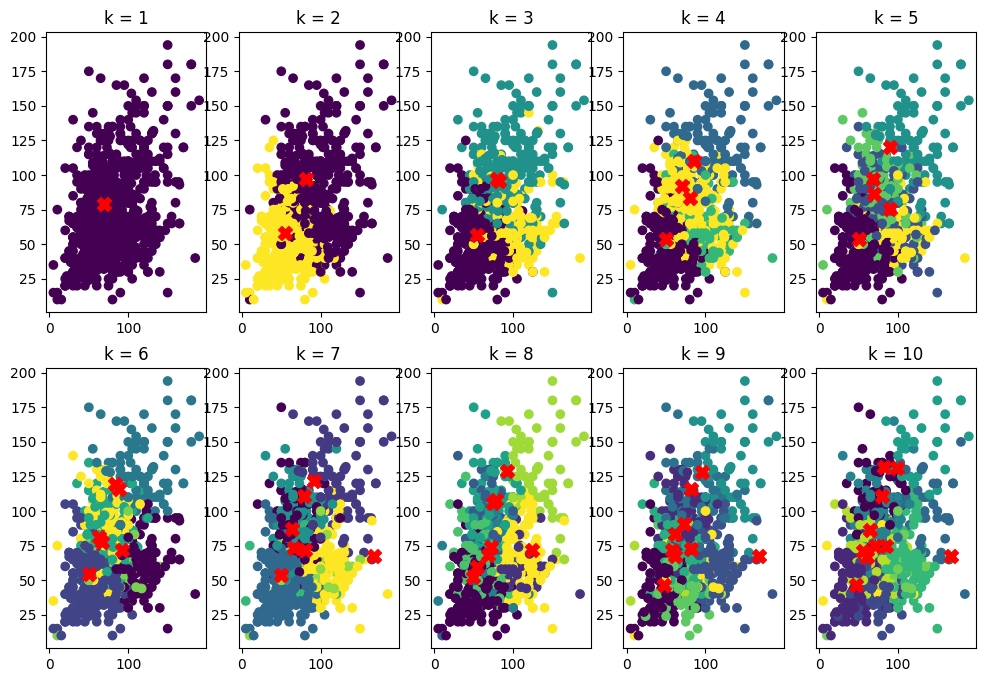

In [25]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(X)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(X["Attack"],X['Sp. Atk'], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


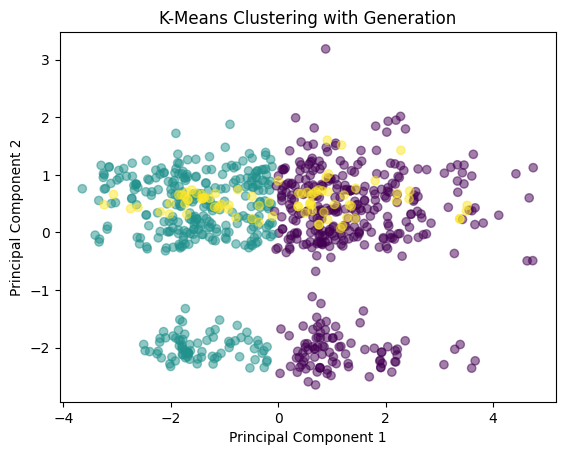

Silhouette Score for K-Means: 0.1900013434697211


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos desde el archivo CSV
pokemon_data = pd.read_csv('pokemon.csv')

# Seleccionar columnas relevantes para el clustering
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed","Generation"]
X = pokemon_data[features]

# Convertir la variable categórica "Generation" en variables dummy
X = pd.get_dummies(X, columns=['Generation'], prefix='Gen', drop_first=True)

# Escalar las características para K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Visualización
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('K-Means Clustering with Generation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Silhouette Score para K-Means
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
